In [1]:
# Integrated water vapor 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import seaborn as sns
import math
import time

In [3]:
# data keys: time, 
# azi(time) (comment = "0=North, 90=East, 180=South, 270=West"),
# WRONG DATA: prw(time)(comment = "These values denote the vertically integrated amount of water vapor from the surface to TOA.)
# data taken during elevation at 30°: prw_off_zenith
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20200130000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']

data_list = list(zip(t,azi,prw)) # tuple with data time[0], azi[1], prw[2]
scan_iwv = [[]]
for i in range(azi.size):
    if azi[i] == np.min(azi):
        scan_iwv.append([])
        
    if math.isnan(prw[i]):
        scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1))
    else:
        scan_iwv[-1].append(data_list[i])
print(len(scan_iwv[1]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Warning: converting a masked element to nan.


72


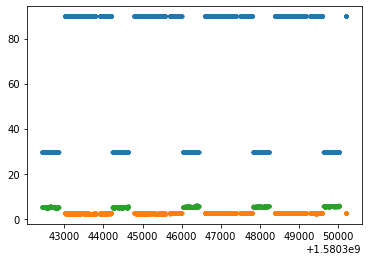

In [4]:
plt.plot(t[:5000],elevation[:5000],'.')
plt.plot(t[:5000],prw[:5000],'.')
plt.plot(t[:5000],prw_offzen[:5000],'.')

In [5]:

print(len(scan_iwv[0]))
print(len(scan_iwv[-1]))
print(prw[1000])

#add zeros to first and last array of scan_iwv
#scan_iwv[0] = np.pad(scan_iwv[0],(len(scan_iwv[1])-len(scan_iwv[0]),0), 'constant')
#scan_iwv[-1] = np.pad(scan_iwv[-1],(0,len(scan_iwv[1])-len(scan_iwv[-1])), 'constant')
#print(scan_iwv[0])
#print(scan_iwv[-1])
#for i in scan_iwv:
#    print(np.size(i))
    

#try to make array only with data points 
iwv_values = [[]]
iwv_time = [[]]
iwv_azi =[[]]
last_val = -1
for i in range(len(scan_iwv)):
    for j in range(len(scan_iwv[i])):
        if scan_iwv[i][j][2] != -1:
            if last_val == -1:
                iwv_values.append([])
                iwv_time.append([])
                iwv_azi.append([])
            iwv_values[-1].append(scan_iwv[i][j][2])
            iwv_time[-1].append(scan_iwv[i][j][0])
            iwv_azi[-1].append(scan_iwv[i][j][1])
        last_val = scan_iwv[i][j][2]

for i in iwv_values:
    print(np.size(i))
print('len iwv',len(iwv_values))

4
38
2.308426
0
1051
1075
1065
1074
1063
1073
1065
1072
1065
1073
1063
1073
1066
1075
1066
1072
1065
1077
1063
1067
1064
1075
1066
1075
1060
1075
1066
1071
1065
1073
1064
1075
1066
1073
1063
1071
1063
1072
1056
1072
1060
1071
1000
1015
1007
997
1010
len iwv 48


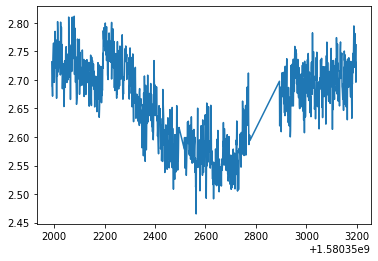

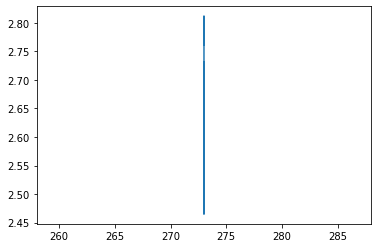

In [6]:
plt.plot(iwv_time[6],iwv_values[6])
plt.figure()
plt.plot(iwv_azi[6],iwv_values[6])

29.6875
56698


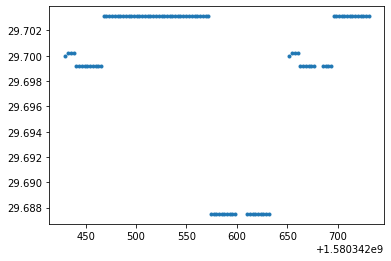

In [7]:
print(np.min(elevation))
print(len(prw_offzen))
plt.plot(t[:100],elevation[:100],'.')


In [8]:
data_list = list(zip(t,elevation,prw_offzen,azi)) # tuple with data time[0], azi[1], prw[2], azi[3]
scan_iwv = [[]]
cutoff_ele = 30
for i in range(elevation.size):
    if elevation[i] > cutoff_ele:
        scan_iwv.append([])
        
    if math.isnan(prw_offzen[i]):
        scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1,data_list[i][3]))
    else:
        scan_iwv[-1].append(data_list[i])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Warning: converting a masked element to nan.
  


In [10]:
iwv_values = [[]]
iwv_time = [[]]
iwv_ele = [[]]
iwv_azi = [[]]
last_val = -1
for i in range(len(scan_iwv)):
    for j in range(len(scan_iwv[i])):
        if scan_iwv[i][j][2] != -1:
            if last_val == -1:
                iwv_values.append([])
                iwv_time.append([])
                iwv_ele.append([])
                iwv_azi.append([])
            iwv_values[-1].append(scan_iwv[i][j][2])
            result_time = time.gmtime(scan_iwv[i][j][0])
            iwv_time[-1].append(result_time.tm_hour)
            iwv_ele[-1].append(scan_iwv[i][j][1])
            iwv_azi[-1].append(scan_iwv[i][j][3])
        last_val = scan_iwv[i][j][2]
        
        

In [11]:
for i in iwv_values:
    print(np.size(i))
print('len iwv_values', len(iwv_values))    

0
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
42
len iwv_values 49


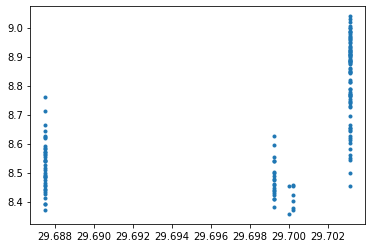

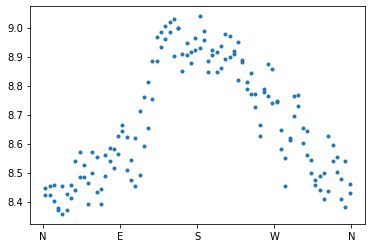

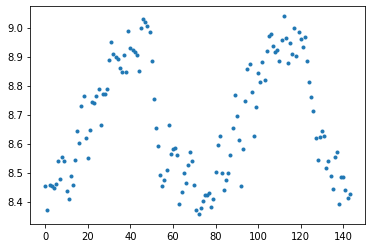

In [12]:
ticks = [0,90,180,270,360]
labels = ['N','E', 'S', 'W', 'N']

#plt.plot(iwv_time[15],iwv_values[15])
plt.figure()
plt.plot(iwv_ele[15],iwv_values[15],'.')
plt.figure()
plt.plot(iwv_azi[15],iwv_values[15],'.')
plt.xticks(ticks,labels)
plt.figure()
plt.plot(iwv_values[15],'.')

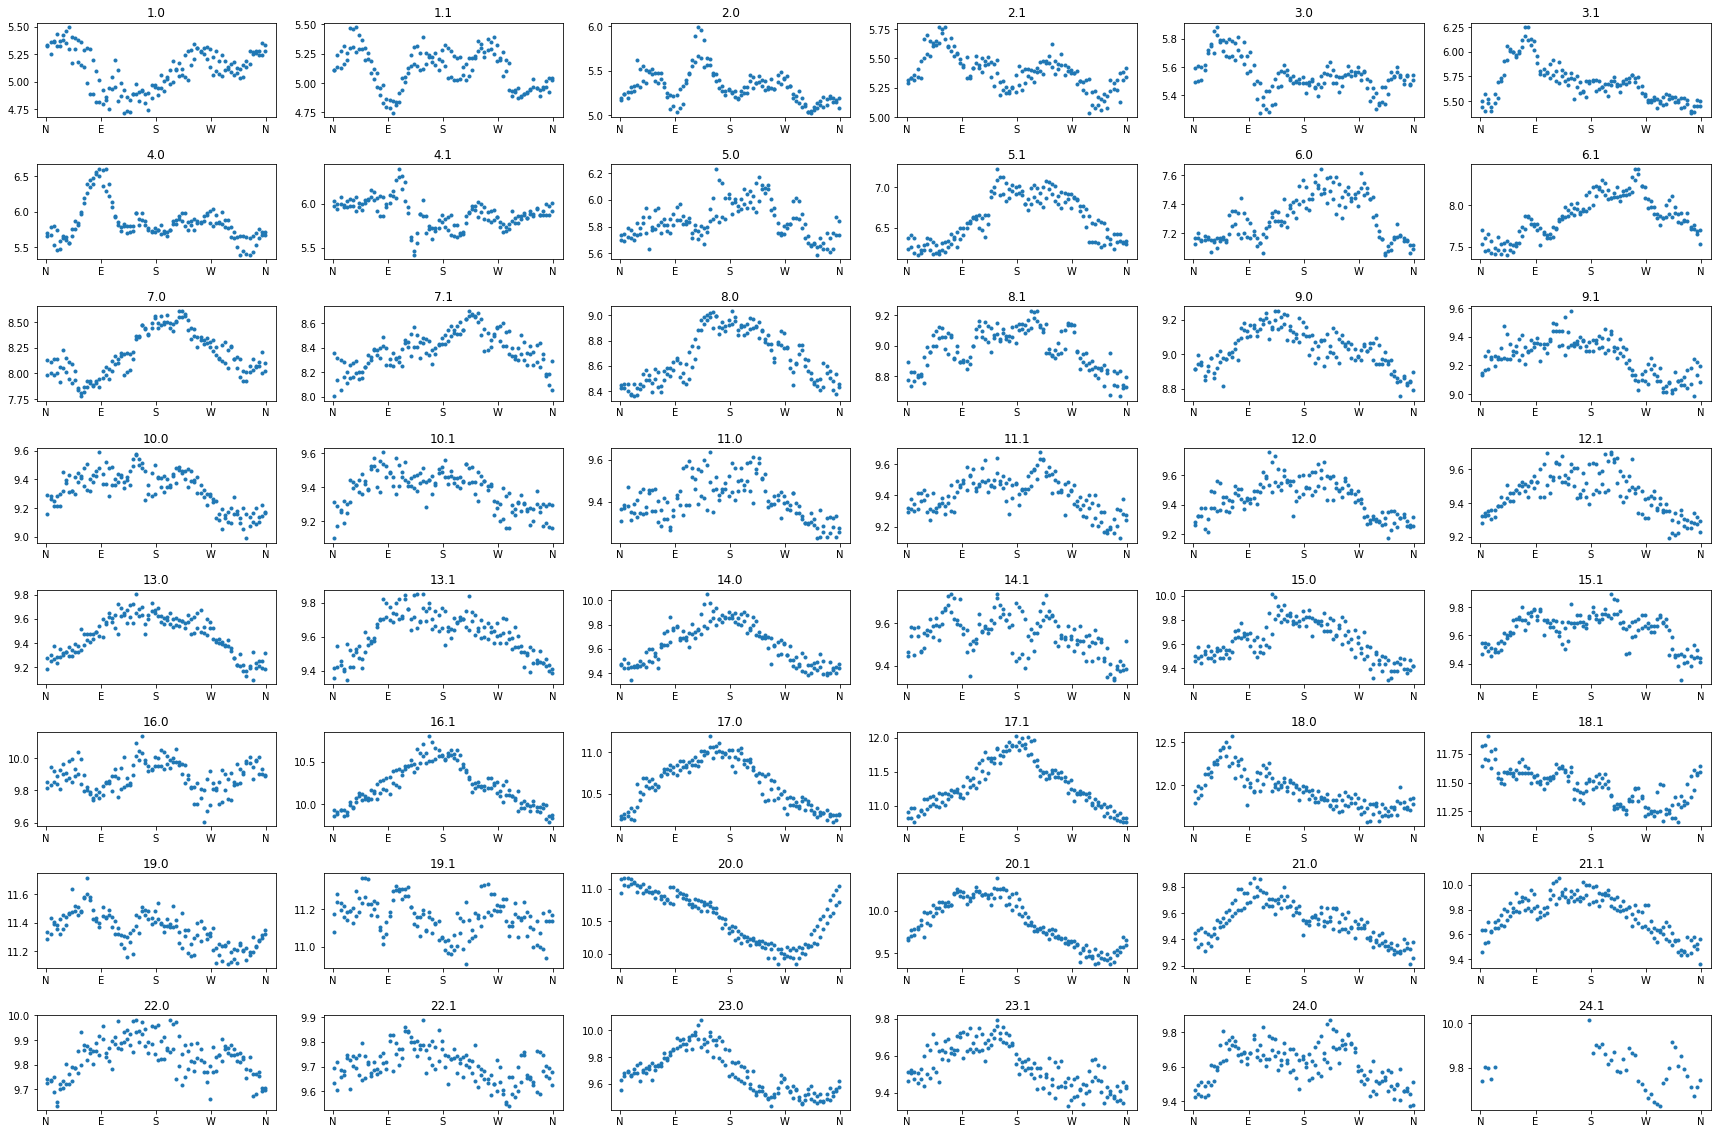

In [13]:
#make plot for each scan
fig, ax = plt.subplots(8,6, figsize=(30, 20))
ax = ax.ravel()
for i in range(1,len(iwv_values)):
    ax[i-1].plot(iwv_azi[i], iwv_values[i],'.')
    ax[i-1].set_title(str(int(np.ceil(i/2)))+"."+str((i+1)%2))
    fig.subplots_adjust(hspace=0.5)
    ax[i-1].set_xticks(ticks)
    ax[i-1].set_xticklabels(labels)

In [179]:
print(len(iwv_values))

49


In [2]:
#for later: write function
#function that organizes the data
def iwv_scan_data(t,elevation,prw_offzen,azi):
    """
    Organises IWV off zenith data used for quickscans and other plots.
    
    Parameters:
        t: time of each scan, measured in seconds since 1970 (cannot be calles time,
           function gets confused with time package)
        elevation: 
        prw_offzen: data measured during off zenith, has data while elevation is at 30°
        azi: azimuth angle, measures: 0=North, 90=East, 180=South, 270=West
    
    Returns:
        iwv_values: organized data, while elevation is at 30°
        iwv_azi: organized data of the azimuth angle (0=North, 90=East, 180=South, 270=West)
        iwv_time: organized time, in hours + minutes/60
        iwv_ele: organized elevation data
    """
    data_list = list(zip(t,elevation,prw_offzen,azi)) # tuple with data time[0], elevation[1], prw_off_zenith[2], azimuth[3]
    scan_iwv = [[]]
    cutoff_ele = 30
    for i in range(elevation.size):
        if elevation[i] > cutoff_ele:
            scan_iwv.append([])
        
        if math.isnan(prw_offzen[i]):
            scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1,data_list[i][3]))
        else:
            scan_iwv[-1].append(data_list[i])
            iwv_values = [[]]
    iwv_time = [[]]
    iwv_ele = [[]]
    iwv_azi = [[]]
    last_val = -1
    for i in range(len(scan_iwv)):
        for j in range(len(scan_iwv[i])):
            if scan_iwv[i][j][2] != -1:
                if last_val == -1:
                    iwv_values.append([])
                    iwv_time.append([])
                    iwv_ele.append([])
                    iwv_azi.append([])
                iwv_airmass_corr = np.sin(np.deg2rad(scan_iwv[i][j][1]))*scan_iwv[i][j][2]
                # air mass corrected IWV = sin( elevation angle ) * prw_off_zenith 
                #iwv_values[-1].append(scan_iwv[i][j][2])
                iwv_values[-1].append(iwv_airmass_corr)
                result_time = time.gmtime(scan_iwv[i][j][0])
                iwv_time[-1].append(result_time.tm_hour + (result_time.tm_min/60))
                iwv_ele[-1].append(scan_iwv[i][j][1])
                iwv_azi[-1].append(scan_iwv[i][j][3])
            last_val = scan_iwv[i][j][2]
    return iwv_values,iwv_time,iwv_ele,iwv_azi    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


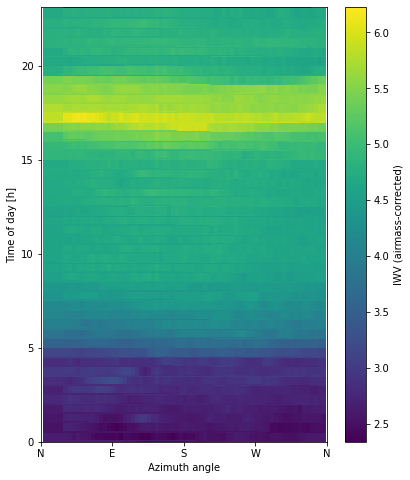

In [244]:
# create plot using both functions
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20200130000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values,iwv_time,iwv_ele,iwv_azi = iwv_scan_data(t,elevation,prw_offzen,azi)

xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi[1:-1],iwv_time[1:-1],iwv_values[1:-1])
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

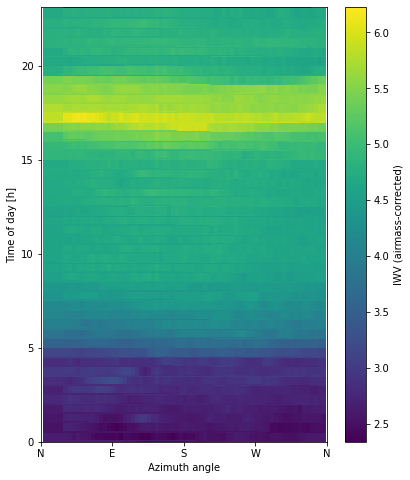

In [182]:
iwv_scan_plot(iwv_values,iwv_time,iwv_ele,iwv_azi)

In [181]:
# function can make plot of every single scan or of entire day   
def iwv_scan_plot(iwv_values,iwv_time,iwv_ele,iwv_azi,singlescan=None):
    """
    Creates either a plot of every single scan during the day 
    or a plot of the data over time and azimut angle (resemling the quicklooks)
    
    Parameters: (output from iwv_scan_data)
        iwv_values: organized data, while elevation is at 30°
        iwv_time: organized time, in hours + minutes/60
        iwv_ele: organized elevation data
        iwv_azi: organized data of the azimuth angle (0=North, 90=East, 180=South, 270=West)
        singlescan: if singlescan == none a plot resembling the quicklook scan is created,
                    otherwise a plot of every single scan during the day is generated
    """
    xticks = [0,90,180,270,360]
    xlabels = ['N','E', 'S', 'W', 'N']
    #yticks = [2,4,6,8,10,12,14,16,18,20,22]
    
    if singlescan == None:
        plt.figure(figsize=(6.4,8))
        plt.pcolormesh(iwv_azi[1:-1],iwv_time[1:-1],iwv_values[1:-1])
        plt.xticks(xticks,xlabels)
        #plt.yticks(yticks)
        plt.xlabel('Azimuth angle')
        plt.ylabel('Time of day [h]')
        plt.colorbar(label=r'IWV (airmass-corrected)')
    else:
        fig, ax = plt.subplots(8,6, figsize=(30, 20))
        ax = ax.ravel()
        for i in range(1,len(iwv_values)):
            ax[i-1].plot(iwv_azi[i], iwv_values[i],'.')
            ax[i-1].set_title(str(int(np.ceil(i/2)))+"."+str((i+1)%2))
            fig.subplots_adjust(hspace=0.5)
            ax[i-1].set_xticks(xticks)
            ax[i-1].set_xticklabels(xlabels)
        

# Deviation from mean


(48,)


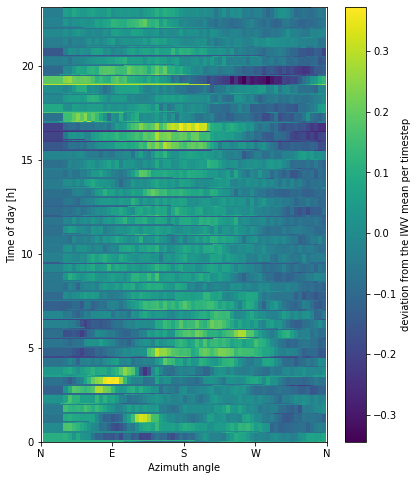

In [313]:
# create plot with mean subtracted from every scan
#print(iwv_values[1:-2])
iwv_val_mean = np.mean(np.reshape(iwv_values[1:-1],(47,144)),axis=1)
iwv_val_mean = np.reshape(iwv_val_mean,(47,1))

iwv_dev_mean = [[]] #gives deviation of iwv values from mean 
for i in range(1,len(iwv_values)-1):
    iwv_dev_mean.append([])
    for j in range(len(iwv_values[i])):
        iwv_dev_mean[i-1].append(float(iwv_values[i][j] - iwv_val_mean[i-1]))

#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean3)-1):
    max_dev.append(max(iwv_dev_mean3[i]))
    min_dev.append(min(iwv_dev_mean3[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)                    

plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi[1:-1],iwv_time[1:-1],iwv_dev_mean[:-1],cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

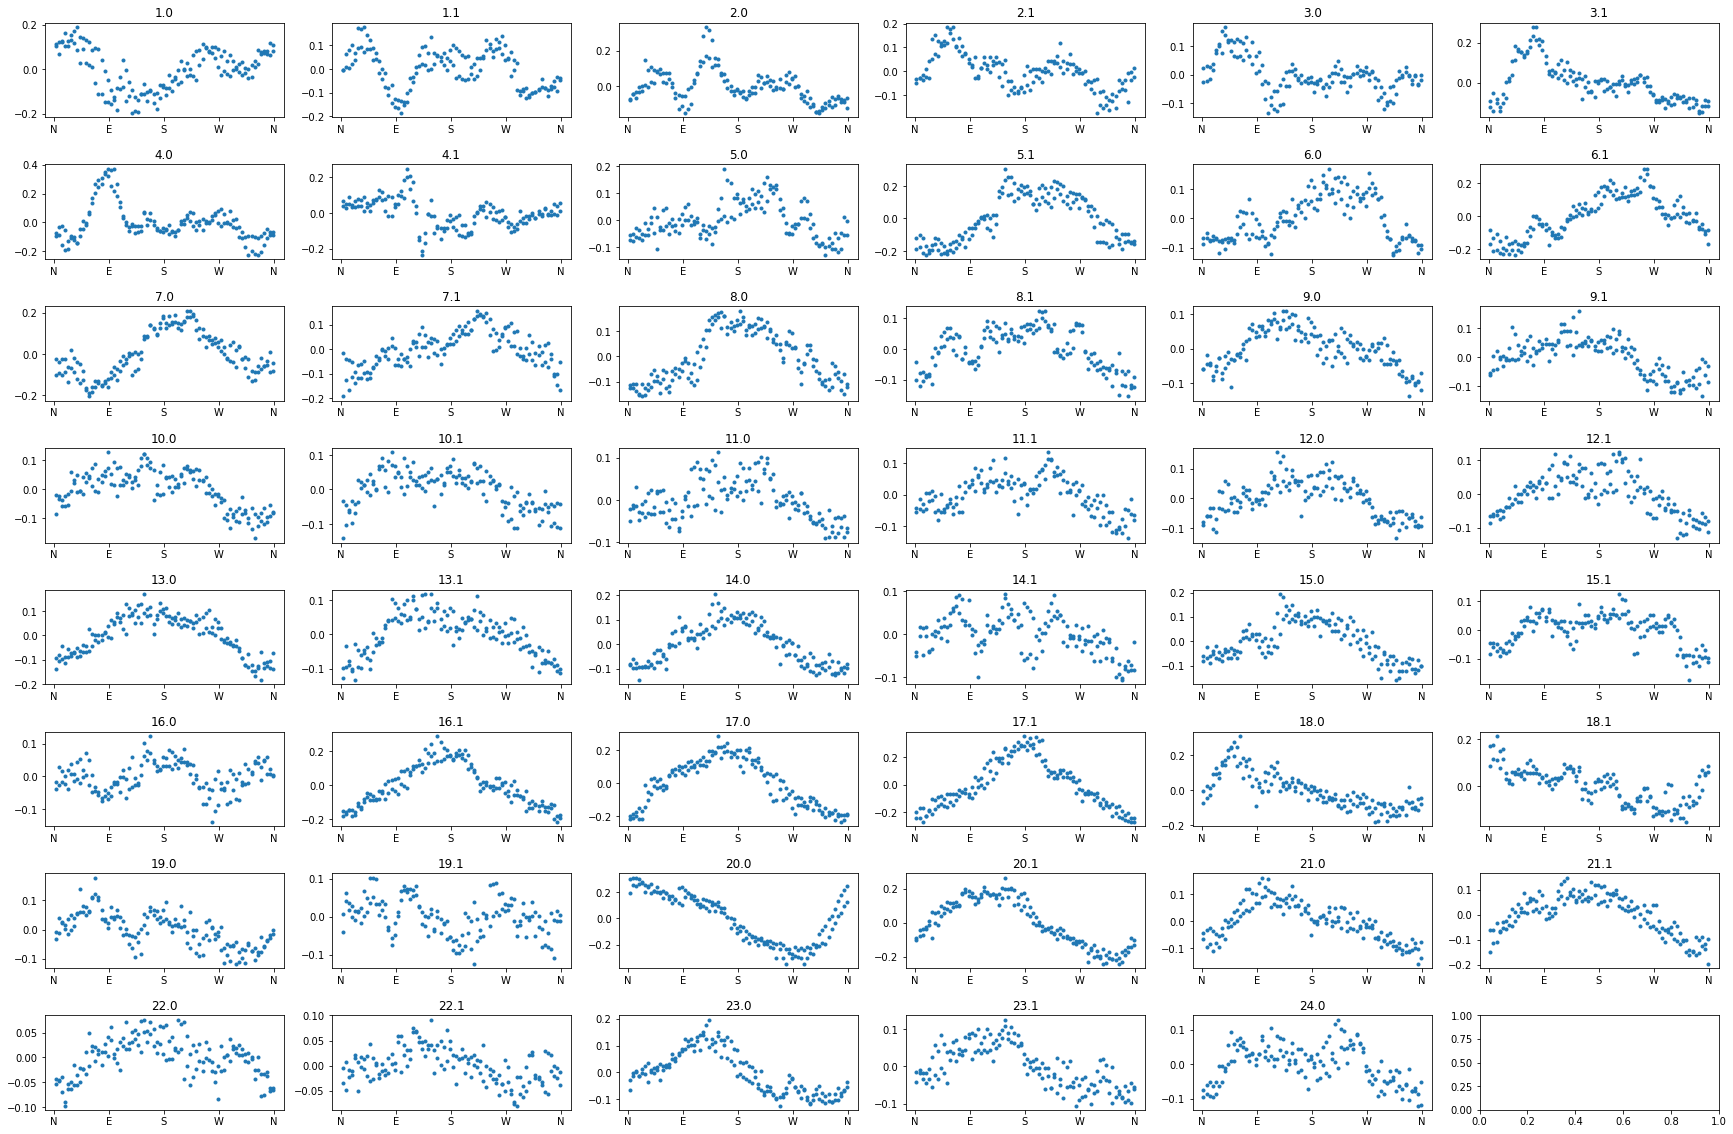

In [185]:
fig, ax = plt.subplots(8,6, figsize=(30, 20))
ax = ax.ravel()
for i in range(1,len(iwv_values)-1):
    ax[i-1].plot(iwv_azi[i], iwv_dev_mean[i-1],'.')
    #ax[i-1].set_title(str(int(np.ceil(i/2)))+"."+str((i+1)%2))
    ax[i-1].set_title(str(int(np.ceil(i/2)))+"."+str((i+1)%2))
    fig.subplots_adjust(hspace=0.5)
    ax[i-1].set_xticks(xticks)
    ax[i-1].set_xticklabels(xlabels)

# 29.09.2019


In [7]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190929000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values3,iwv_time3,iwv_ele3,iwv_azi3 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


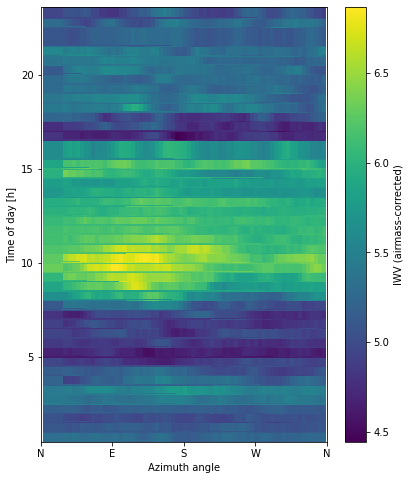

In [10]:
iwv_values3,iwv_time3,iwv_ele3,iwv_azi3 = data_splice(iwv_values3,iwv_time3,iwv_ele3,iwv_azi3,144)
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
#masked_iwv = np.ma.masked_where(np.isnan(iwv_values2),iwv_values2)
plt.pcolormesh(iwv_azi3,iwv_time3,iwv_values3)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

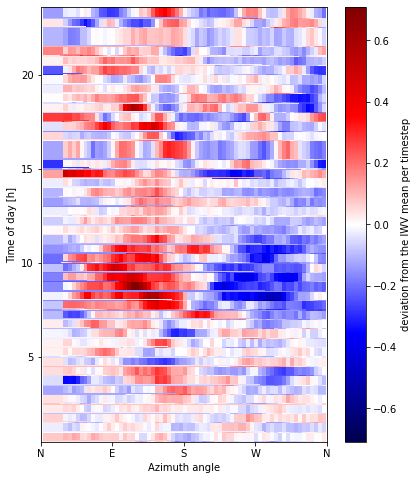

In [11]:
# create plot with mean subtracted from every scan

iwv_val_mean3 = np.mean(iwv_values3,axis=1)
iwv_val_mean3 = np.reshape(iwv_val_mean3,(45,1))

iwv_dev_mean3 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values3)):
    iwv_dev_mean3.append([])
    for j in range(len(iwv_values3[i])):
        iwv_dev_mean3[i].append(float(iwv_values3[i][j] - iwv_val_mean3[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean3)-1):
    max_dev.append(max(iwv_dev_mean3[i]))
    min_dev.append(min(iwv_dev_mean3[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)            
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi3,iwv_time3,iwv_dev_mean3[:-1],cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# 23.09.2019


In [20]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190923000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values2,iwv_time2,iwv_ele2,iwv_azi2 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [500]:
print(len(iwv_values2))

45


In [9]:
def data_splice(iwv_values, iwv_time, iwv_ele, iwv_azi, acc_length):
    to_del = []
    for i in range(len(iwv_values)):
        if len(iwv_values[i]) != acc_length:
            to_del.append(i)
    iwv_values = np.delete(iwv_values, to_del, 0)  
    iwv_time = np.delete(iwv_time, to_del, 0)
    iwv_ele = np.delete(iwv_ele, to_del, 0) 
    iwv_azi = np.delete(iwv_azi, to_del, 0) 
    return np.stack(iwv_values),np.stack(iwv_time),np.stack(iwv_ele),np.stack(iwv_azi)

In [100]:
#idea: for iwv_time repeat last data point
def data_replace(iwv_values, iwv_azi, iwv_time, acc_length, rep_line): #acc_lenght: accepted length, meaning normal lenght of array
                                                            #rep_line: number of line to replace the shorter line with
    nan_array = np.empty(acc_length)
    nan_array[:] = np.nan
    for i in range(len(iwv_values)):
        if iwv_values[i] != []:
            if len(iwv_values[i]) != acc_length:
                iwv_values[i] = nan_array
                iwv_azi[i] = iwv_azi[rep_line]
                to_append = iwv_time[i][-2]
                iwv_time_nest = iwv_time[i]
                iwv_time_nest.append(to_append)
    return np.stack(iwv_values[1:]),np.stack(iwv_azi[1:]),np.stack(iwv_time[1:])  

In [300]:
iwv_values2,iwv_time2,iwv_ele2,iwv_azi2 = data_splice(iwv_values2,iwv_time2,iwv_ele2,iwv_azi2,144)
for i in range(len(iwv_values2)):
    print(len(iwv_values2[i]))
print(np.shape(iwv_values2))  
print(np.shape(iwv_time2))
print(np.shape(iwv_ele2))
print(np.shape(iwv_azi2))

144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
144
(42, 144)
(42, 144)
(42, 144)
(42, 144)


In [24]:
iwv_values2, iwv_azi2, iwv_time2 = data_replace(iwv_values2,iwv_azi2,iwv_time2,144,10)

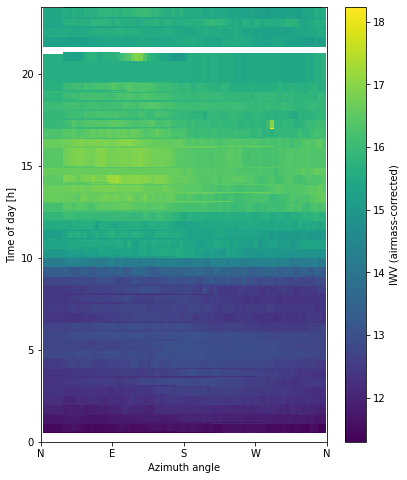

In [504]:
#first two bins are shorter, 0 and 143
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values2),iwv_values2)
plt.pcolormesh(iwv_azi2,iwv_time2,masked_iwv)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')


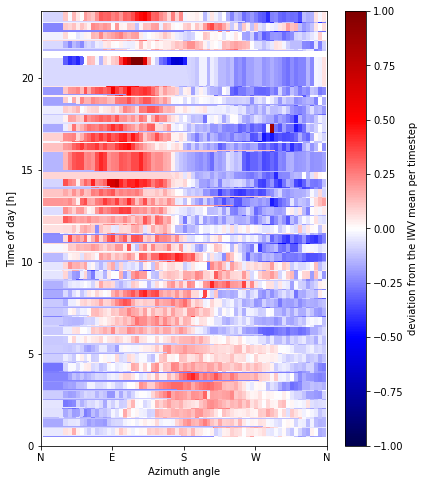

In [25]:
#find vmin and vmax automatically!!
iwv_val_mean2 = np.mean(iwv_values2,axis=1)
iwv_val_mean2 = np.reshape(iwv_val_mean2,(44,1))

iwv_dev_mean2 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values2)):
    iwv_dev_mean2.append([])
    for j in range(len(iwv_values2[i])):
        iwv_dev_mean2[i].append(float(iwv_values2[i][j] - iwv_val_mean2[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean2)-1):
    max_dev.append(max(iwv_dev_mean2[i]))
    min_dev.append(min(iwv_dev_mean2[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi2,iwv_time2,iwv_dev_mean2[:-1], cmap='seismic',vmin=-1,vmax=1)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# 16.09.2019

In [44]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190916000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values4,iwv_time4,iwv_ele4,iwv_azi4 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [17]:
#acc_length 144
iwv_values4, iwv_azi4, iwv_time4 = data_replace(iwv_values4,iwv_azi4,iwv_time4,144,10)

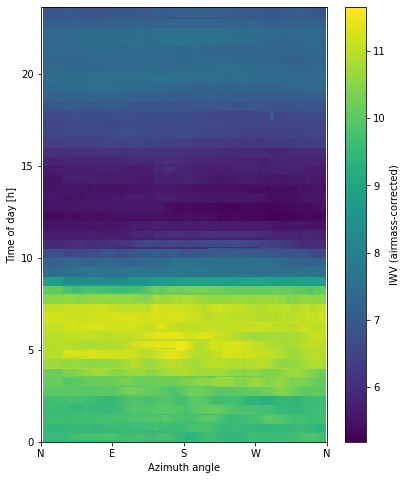

In [18]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values4),iwv_values4)
plt.pcolormesh(iwv_azi4,iwv_time4,masked_iwv)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

In [19]:
print(len(iwv_values4))

48


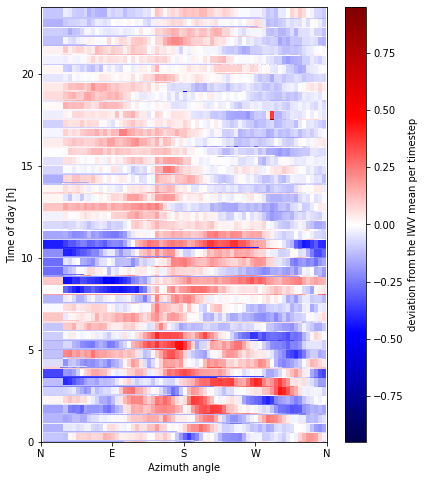

In [20]:
#always need to change len(iwv_values)
iwv_val_mean4 = np.mean(iwv_values4,axis=1)
iwv_val_mean4 = np.reshape(iwv_val_mean4,(48,1))

iwv_dev_mean4 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values4)):
    iwv_dev_mean4.append([])
    for j in range(len(iwv_values4[i])):
        iwv_dev_mean4[i].append(float(iwv_values4[i][j] - iwv_val_mean4[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean4)-1):
    max_dev.append(max(iwv_dev_mean4[i]))
    min_dev.append(min(iwv_dev_mean4[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi4,iwv_time4,iwv_dev_mean4[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# 18.08.2019


In [60]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190818000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']

#changing the function test
data_list = list(zip(t,elevation,prw_offzen,azi)) # tuple with data time[0], elevation[1], prw_off_zenith[2], azimuth[3]
scan_iwv = [[]]
cutoff_ele = 30
for i in range(elevation.size):
    if elevation[i] > cutoff_ele:
        scan_iwv.append([])
        
    if math.isnan(prw_offzen[i]):
        scan_iwv[-1].append((data_list[i][0],data_list[i][1],-1,data_list[i][3]))
    else:
        scan_iwv[-1].append(data_list[i])
        iwv_values = [[]]
iwv_time = [[]]
iwv_ele = [[]]
iwv_azi = [[]]
last_val = -1
#new lines
last_time = scan_iwv[0][0][0]
#last_time = last_time.tm_gmtoff
for i in range(len(scan_iwv)):
    for j in range(len(scan_iwv[i])):
        if scan_iwv[i][j][2] != -1:
            #changed line
            result_time = time.gmtime(scan_iwv[i][j][0])
            if last_val == -1 or (scan_iwv[i][j][0] - last_time) > 10*60:
                #new line 
                #print(scan_iwv[i][j][0] - last_time)
                iwv_values.append([])
                iwv_time.append([])
                iwv_ele.append([])
                iwv_azi.append([])
            iwv_airmass_corr = np.sin(np.deg2rad(scan_iwv[i][j][1]))*scan_iwv[i][j][2]
            iwv_values[-1].append(iwv_airmass_corr)
            #result_time = time.gmtime(scan_iwv[i][j][0])
            iwv_time[-1].append(result_time.tm_hour + (result_time.tm_min/60))
            iwv_ele[-1].append(scan_iwv[i][j][1])
            iwv_azi[-1].append(scan_iwv[i][j][3])
            #new line
            last_time = scan_iwv[i][j][0]
        last_val = scan_iwv[i][j][2]
           

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Warning: converting a masked element to nan.


In [61]:
for i in range(1,len(iwv_values)):
    #print(len(iwv_values[i]))
    if len(iwv_values[i]) != 144:
        print(i)
print('length iwv_values',len(iwv_values))        

15
16
31
32
length iwv_values 45


In [77]:
for i in range(1,len(iwv_values)):
    if len(iwv_values[i]) != 144 and len(iwv_values[i+1]) != 144:
        nan_this = np.empty((144-len(iwv_values[i])))
        nan_this[:] = np.nan
        nan_next = np.empty((144-len(iwv_values[i+1])))
        nan_next[:] = np.nan   
        
        iwv_values[i] = np.concatenate((iwv_values[i],nan_this))
        iwv_azi[i] = iwv_azi[i-1]
        this_time = [iwv_time[i][-2]]*(144 - len(iwv_time[i]))
        iwv_time[i] = np.concatenate((iwv_time[i],this_time))
        
        iwv_values[i+1] = np.concatenate((nan_next,iwv_values[i+1]))   
        iwv_azi[i+1] = iwv_azi[i-2]
        next_time = [iwv_time[i+1][0]]*(144 - len(iwv_time[i+1]))
        print(len(iwv_time[i+1]))
        iwv_time[i+1] = np.concatenate((next_time,iwv_time[i+1]))
#for i in range(len(iwv_values)):
 #   print(np.shape(iwv_time[i]))        
iwv_values = np.stack(iwv_values[1:])
iwv_azi = np.stack(iwv_azi[1:])
iwv_time = np.stack(iwv_time[1:]) 


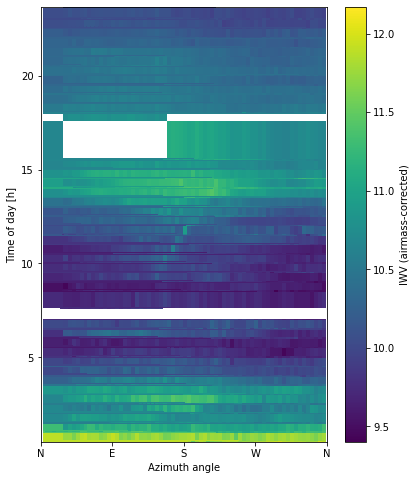

In [103]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values),iwv_values)
plt.pcolormesh(iwv_azi,iwv_time,masked_iwv,cmap='viridis')
plt.xticks(xticks,xlabels)
#cmap.set_bad sets color for masked values
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

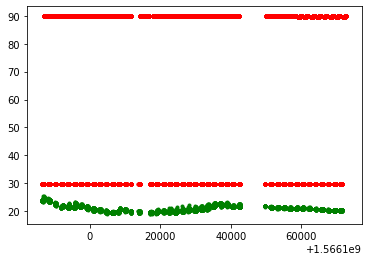

In [10]:
plt.plot(t,elevation,'r.')
#plt.plot(t,prw,'b.')
plt.plot(t,prw_offzen,'g.')
#plt.plot(t[:500],'.')

In [20]:
#acc_length 144
iwv_values5, iwv_azi5, iwv_time5 = data_replace(iwv_values5,iwv_azi5,iwv_time5,144,10)

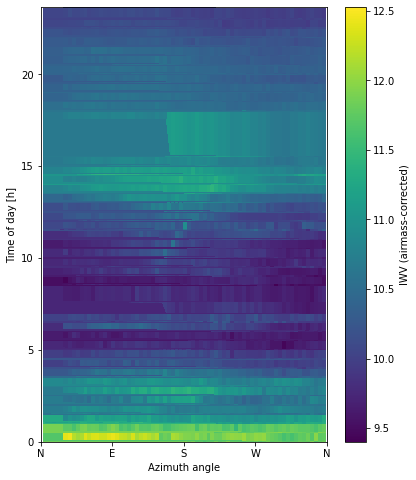

In [29]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values5),iwv_values5)
plt.pcolormesh(iwv_azi5,iwv_time5,masked_iwv)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

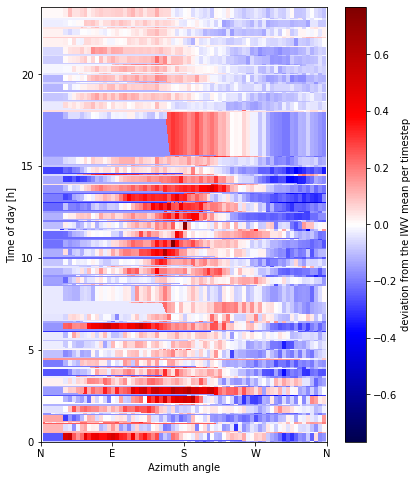

In [38]:
#always need to change len(iwv_values)
iwv_val_mean5 = np.mean(iwv_values5,axis=1)
iwv_val_mean5 = np.reshape(iwv_val_mean5,(42,1))

iwv_dev_mean5 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values5)):
    iwv_dev_mean5.append([])
    for j in range(len(iwv_values5[i])):
        iwv_dev_mean5[i].append(float(iwv_values5[i][j] - iwv_val_mean5[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean5)-1):
    max_dev.append(max(iwv_dev_mean5[i]))
    min_dev.append(min(iwv_dev_mean5[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi5,iwv_time5,iwv_dev_mean5[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# 19.08.2019

In [3]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190819000029.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values6,iwv_time6,iwv_ele6,iwv_azi6 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [13]:
#acc_length 144
iwv_values6, iwv_azi6, iwv_time6 = data_replace(iwv_values6,iwv_azi6,iwv_time6,144,10)

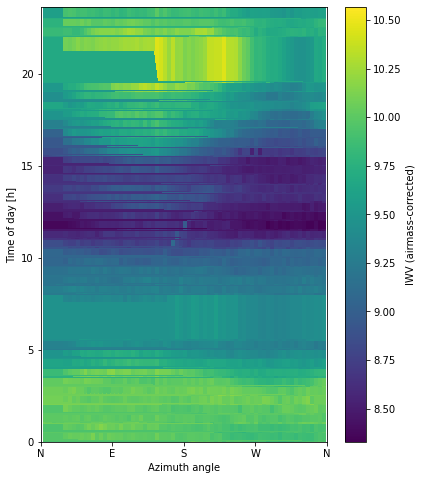

In [14]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values6),iwv_values6)
plt.pcolormesh(iwv_azi6,iwv_time6,masked_iwv)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

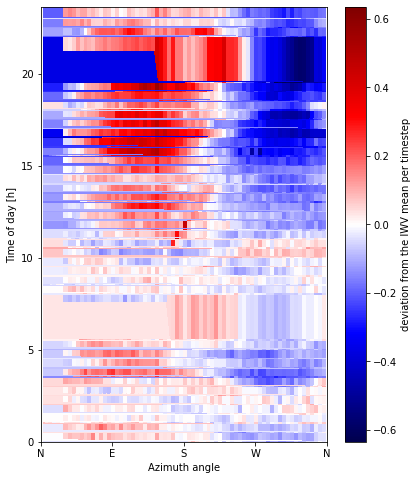

In [17]:
#always need to change len(iwv_values)
iwv_val_mean6 = np.mean(iwv_values6,axis=1)
iwv_val_mean6 = np.reshape(iwv_val_mean6,(40,1))

iwv_dev_mean6 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values6)):
    iwv_dev_mean6.append([])
    for j in range(len(iwv_values6[i])):
        iwv_dev_mean6[i].append(float(iwv_values6[i][j] - iwv_val_mean6[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean6)-1):
    max_dev.append(max(iwv_dev_mean6[i]))
    min_dev.append(min(iwv_dev_mean6[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi6,iwv_time6,iwv_dev_mean6[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# 20.08.2019

In [23]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20190820000030.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values7,iwv_time7,iwv_ele7,iwv_azi7 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [3]:
def iwv_fill_nan(iwv_values,iwv_time,iwv_azi,rep_line):
    for i in range(1,len(iwv_values)):
        if len(iwv_values[i]) != 144:
            nan_this = np.empty((144-len(iwv_values[i])))
            nan_this[:] = np.nan 
        
            iwv_values[i] = np.concatenate((iwv_values[i],nan_this))
            iwv_azi[i] = iwv_azi[rep_line]
            this_time = [iwv_time[i][-2]]*(144 - len(iwv_time[i]))
            iwv_time[i] = np.concatenate((iwv_time[i],this_time))
    
            #for i in range(len(iwv_values)):
            #   print(np.shape(iwv_time[i]))        
    return np.stack(iwv_values[1:]),np.stack(iwv_azi[1:]),np.stack(iwv_time[1:])

In [25]:
iwv_values7, iwv_azi7, iwv_time7 = iwv_fill_nan(iwv_values7,iwv_time7,iwv_azi7,10)

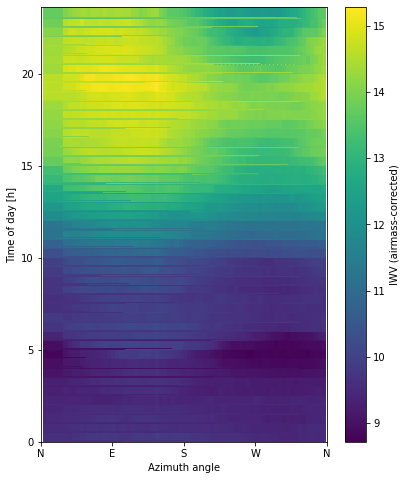

In [26]:
#does not look like quicklook, white lines are wrong
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values7),iwv_values7)
plt.pcolormesh(iwv_azi7,iwv_time7,masked_iwv,cmap='viridis')
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')

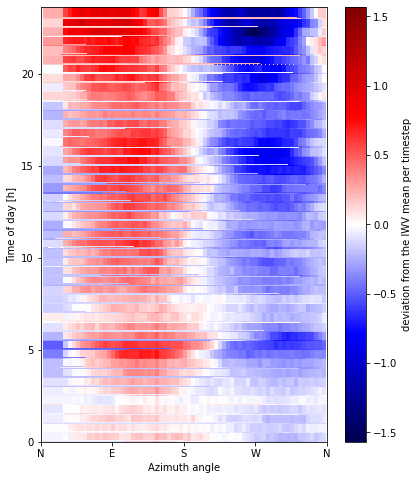

In [29]:
#always need to change len(iwv_values)
iwv_val_mean7 = np.nanmean(iwv_values7,axis=1)
iwv_val_mean7 = np.reshape(iwv_val_mean7,(48,1))

iwv_dev_mean7 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values7)):
    iwv_dev_mean7.append([])
    for j in range(len(iwv_values7[i])):
        iwv_dev_mean7[i].append(float(iwv_values7[i][j] - iwv_val_mean7[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean7)-1):
    max_dev.append(max(iwv_dev_mean7[i]))
    min_dev.append(min(iwv_dev_mean7[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi7,iwv_time7,iwv_dev_mean7[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')

# genereate whole month: January

In [51]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20200131001905.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values9,iwv_time9,iwv_ele9,iwv_azi9 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [52]:
iwv_values9, iwv_azi9, iwv_time9 = iwv_fill_nan(iwv_values9,iwv_time9,iwv_azi9,10)

In [55]:
new_time1 = np.zeros(shape=(11,144))
for i in range(len(new_time1)):
    new_time1[i] = np.full((1,144),iwv_time9[i][0])
    #new_time[i] = new_time
print(new_time1)    

[[0.31666667 0.31666667 0.31666667 ... 0.31666667 0.31666667 0.31666667]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.5        1.5        1.5        ... 1.5        1.5        1.5       ]
 ...
 [5.5        5.5        5.5        ... 5.5        5.5        5.5       ]
 [6.         6.         6.         ... 6.         6.         6.        ]
 [6.5        6.5        6.5        ... 6.5        6.5        6.5       ]]


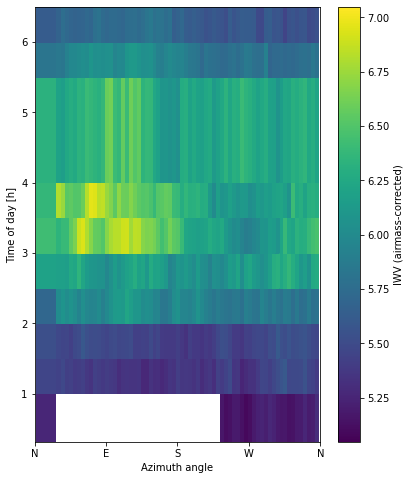

In [56]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values9),iwv_values9)
plt.pcolormesh(iwv_azi9,new_time1,masked_iwv,cmap='viridis')
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='white')
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected)')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/31_01_2020_dailyscan.png')

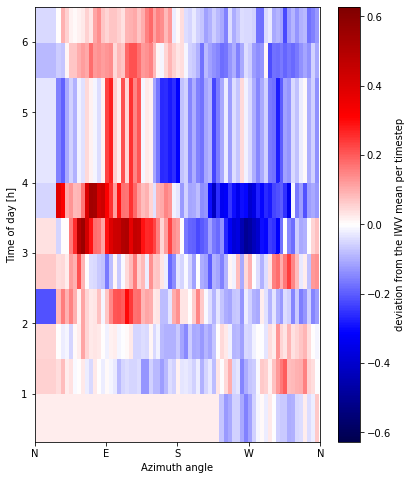

In [58]:
#always need to change len(iwv_values)
iwv_val_mean9 = np.nanmean(iwv_values9,axis=1)
iwv_val_mean9 = np.reshape(iwv_val_mean9,(11,1))

iwv_dev_mean9 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values9)):
    iwv_dev_mean9.append([])
    for j in range(len(iwv_values9[i])):
        iwv_dev_mean9[i].append(float(iwv_values9[i][j] - iwv_val_mean9[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean9)-1):
    max_dev.append(max(iwv_dev_mean9[i]))
    min_dev.append(min(iwv_dev_mean9[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi9,new_time1,iwv_dev_mean9[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/31_01_2020_devmean.png')

# 01.10.2020

In [56]:
#create the data
iwv_data = Dataset('./sups_nya_mwr00_l2_prw_v00_20201001000028.nc')
iwv_data.variables.keys()
t = iwv_data['time']
prw = iwv_data['prw']
azi = iwv_data['azi']
elevation = iwv_data['ele']
prw_offzen = iwv_data['prw_off_zenith']
iwv_values8,iwv_time8,iwv_ele8,iwv_azi8 = iwv_scan_data(t,elevation,prw_offzen,azi)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Warning: converting a masked element to nan.


In [57]:
iwv_values8, iwv_azi8, iwv_time8 = iwv_fill_nan(iwv_values8,iwv_time8,iwv_azi8,10)

In [99]:
#new_time = [np.full((1,144),iwv_time8[i][0]) for i in range(48)]
new_time = np.zeros(shape=(48,144))
for i in range(len(new_time)):
    new_time[i] = np.full((1,144),iwv_time8[i][0])
    #new_time[i] = new_time
print(new_time)    

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.5  0.5  0.5 ...  0.5  0.5  0.5]
 [ 1.   1.   1.  ...  1.   1.   1. ]
 ...
 [22.5 22.5 22.5 ... 22.5 22.5 22.5]
 [23.  23.  23.  ... 23.  23.  23. ]
 [23.5 23.5 23.5 ... 23.5 23.5 23.5]]


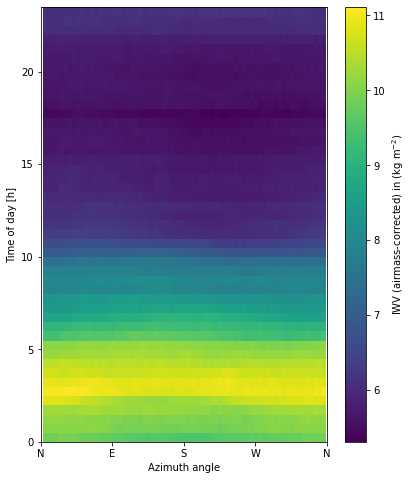

In [7]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
masked_iwv = np.ma.masked_where(np.isnan(iwv_values8),iwv_values8)
plt.pcolormesh(iwv_azi8,new_time,masked_iwv)
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected) in (kg m$^{-2}$)')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/01_10_2020_dailyscan.png')

In [23]:
print(iwv_values8[0][0],iwv_values8[-1][-1])
print(iwv_azi8[0][0],iwv_azi8[-1][-1])
#print(iwv_dev_mean8[0][0],iwv_dev_mean8[-2][-1]) #list index out of range at i = -1???
#print(np.sort(iwv_azi8[1][:72]))
print(iwv_azi8[1])

9.87697696685791 6.324321269989014
18.0 23.0
[ 18.  13.   8.   3. 358. 353. 348. 343. 338. 333. 328. 323. 318. 313.
 308. 303. 298. 293. 288. 283. 278. 273. 268. 263. 258. 253. 248. 243.
 238. 233. 228. 223. 218. 213. 208. 203. 198. 193. 188. 183. 178. 173.
 168. 163. 158. 153. 148. 143. 138. 133. 128. 123. 118. 113. 108. 103.
  98.  93.  88.  83.  78.  73.  68.  63.  58.  53.  48.  43.  38.  33.
  28.  23.  18.  13.   8.   3. 358. 353. 348. 343. 338. 333. 328. 323.
 318. 313. 308. 303. 298. 293. 288. 283. 278. 273. 268. 263. 258. 253.
 248. 243. 238. 233. 228. 223. 218. 213. 208. 203. 198. 193. 188. 183.
 178. 173. 168. 163. 158. 153. 148. 143. 138. 133. 128. 123. 118. 113.
 108. 103.  98.  93.  88.  83.  78.  73.  68.  63.  58.  53.  48.  43.
  38.  33.  28.  23.]


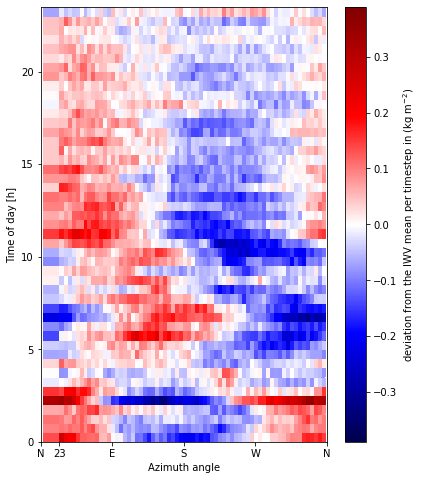

In [8]:
#always need to change len(iwv_values)
iwv_val_mean8 = np.nanmean(iwv_values8,axis=1)
iwv_val_mean8 = np.reshape(iwv_val_mean8,(48,1))

iwv_dev_mean8 = [[]] #gives deviation of iwv values from mean 
for i in range(len(iwv_values8)):
    iwv_dev_mean8.append([])
    for j in range(len(iwv_values8[i])):
        iwv_dev_mean8[i].append(float(iwv_values8[i][j] - iwv_val_mean8[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean8)-1):
    max_dev.append(max(iwv_dev_mean8[i]))
    min_dev.append(min(iwv_dev_mean8[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
#test label 23
xticks = [0,23,90,180,270,360]
xlabels = ['N','23','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
plt.pcolormesh(iwv_azi8,new_time,iwv_dev_mean8[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)           
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/01_10_2020_devmean.png')

In [61]:
for i in range(len(iwv_dev_mean8[:-1])):
    for j in range(len(iwv_dev_mean8[i])):
        if iwv_azi8[i][j]<23.:
            print(iwv_dev_mean8[i][j])
            print(iwv_azi8[i][j])

0.17917399273978418
18.0
0.19432501660453028
13.0
0.2335753904448623
8.0
0.1888366209136123
3.0
0.1616273389922256
18.0
0.21157698498831934
13.0
0.1889873014556045
8.0
0.13545088635550684
3.0
0.14048606819576648
18.0
0.14502937263912585
13.0
0.15234786934322742
8.0
0.10133678383297351
3.0
0.09934837288326648
18.0
0.13345081276363757
13.0
0.14742977089352038
8.0
0.09573966926998523
3.0
0.08017319232433806
18.0
0.06512421161144744
13.0
0.15487926990002165
8.0
0.11735790759533415
3.0
0.11110180407970915
18.0
0.14902370959728728
13.0
0.19081181079357634
8.0
0.10638016253918181
3.0
0.07565903001361463
18.0
0.10890030198627088
13.0
0.11712097459369275
8.0
0.0966827803187904
3.0
0.009491198592716188
18.0
0.06650471025043103
13.0
0.06464123063617322
8.0
0.06653999620013806
3.0
0.21198438273535913
18.0
0.3218409882651443
13.0
0.31690572367774195
8.0
0.32522557841407007
3.0
0.33663819895850366
18.0
0.3724105225669021
13.0
0.3888423310385818
8.0
0.320272194014656
3.0
0.10603402058283429
18.0
0.13

0.059382405545976624
18.0
0.07510181930330084
13.0
0.09064003494050787
8.0
0.04541965987947272
3.0
0.06428918573591424
18.0
0.02502736780378534
13.0
0.03461656305525018
8.0
0.0964013073179455
3.0
0.04947385523054315
18.0
0.057026002142164245
13.0
0.049698922369215026
8.0
0.04746970865461542
3.0
-0.03932899567815973
18.0
-0.04822820756170465
13.0
-0.013921204540464416
8.0
-0.06862539384100153
3.0
0.0341158476140766
18.0
0.0288973417547016
13.0
0.011631545093324647
8.0
-0.06906169984075738
3.0
-0.10439213116963675
18.0
-0.10722025235493948
13.0
-0.1051331361134844
8.0
-0.07478960355122855
3.0
-0.11703308423360159
18.0
-0.08379276593526175
13.0
-0.05526407559712698
8.0
-0.10071333249409964
3.0


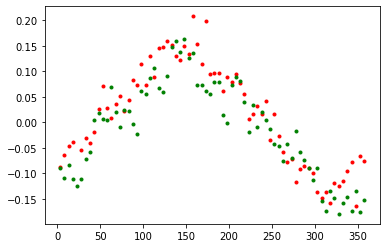

In [15]:
#plt.plot(iwv_azi8[1][:10],iwv_dev_mean8[1][:10],'g.')
plt.plot(iwv_azi8[12][:71],iwv_dev_mean8[12][:71],'r.')
plt.plot(iwv_azi8[12][72:],iwv_dev_mean8[12][72:],'g.')

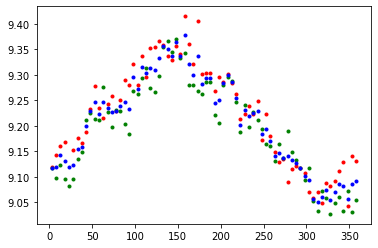

In [59]:
#every scan it scans twice, take mean of these two scans
mean_2scans = [[]] 
for i in range(len(iwv_values8)):
    mean_2scans.append([])
    for j in range(len(iwv_values8[i])):
        if j <= 71:
            mean_2scans[i].append((iwv_values8[i][j]+iwv_values8[i][72+j])/2)
            
plt.plot(iwv_azi8[12][:71],iwv_values8[12][:71],'r.')
plt.plot(iwv_azi8[12][72:],iwv_values8[12][72:],'g.')
plt.plot(iwv_azi8[12][72:],mean_2scans[12][:],'b.')        

In [60]:
#print(np.shape(iwv_values8))
#print(np.shape(iwv_dev_mean8))
mean_2scans2 = np.reshape(mean_2scans[:-1],(48,72))
print(np.shape(mean_2scans2))
print(mean_2scans2[1][1],iwv_azi8[1][1])

(48, 72)
10.129235744476318 13.0


# sorted azi, fixed


In [76]:
iwv_azi_sort = np.zeros(shape=(48,72))
#mean_2scans_sort = np.zeros(shape=(48,72))
for i in range(len(iwv_azi8)):
    zipped_lists = zip(iwv_azi8[i][:72], mean_2scans2[i])
    sorted_pairs = sorted(zipped_lists)

    tuples = zip(*sorted_pairs)
    iwv_azi_sort[i][:72], mean_2scans2[i] = [ list(single) for single in  tuples]

In [82]:
print(iwv_azi_sort[1][2],mean_2scans2[1][2])
print(np.shape(iwv_azi_sort),np.shape(mean_2scans2))

13.0 10.129235744476318
(48, 72) (48, 72)


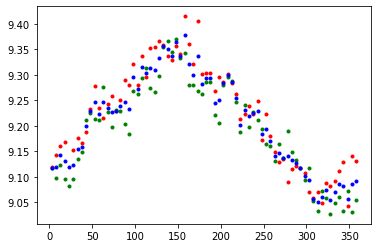

In [83]:
plt.plot(iwv_azi8[12][:71],iwv_values8[12][:71],'r.')
plt.plot(iwv_azi8[12][72:],iwv_values8[12][72:],'g.')
plt.plot(iwv_azi_sort[12][:],mean_2scans2[12][:],'b.')  
#plt.plot(iwv_azi8[1][2],mean_2scans2[1][2],'yo')

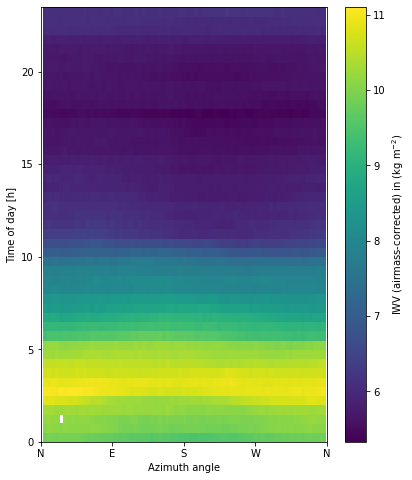

In [90]:
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
    
plt.figure(figsize=(6.4,8))
#masked_iwv = np.ma.masked_where(np.isnan(iwv_values8),iwv_values8)
plt.pcolormesh(iwv_azi_sort,new_time[:,:72],mean_2scans2[:-1])
plt.xticks(xticks,xlabels)
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'IWV (airmass-corrected) in (kg m$^{-2}$)')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/01_10_2020_dailyscan.png')

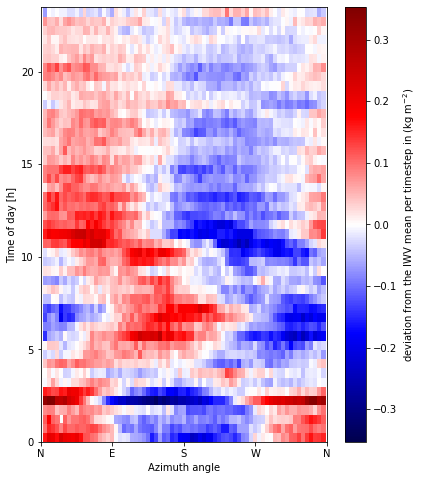

In [93]:
#always need to change len(iwv_values)
iwv_val_mean8 = np.nanmean(mean_2scans2,axis=1)
iwv_val_mean8 = np.reshape(iwv_val_mean8,(48,1))

iwv_dev_mean8 = [[]] #gives deviation of iwv values from mean 
for i in range(len(mean_2scans2)):
    iwv_dev_mean8.append([])
    for j in range(len(mean_2scans2[i])):
        iwv_dev_mean8[i].append(float(mean_2scans2[i][j] - iwv_val_mean8[i]))
        
#find which is higher, min or max, then make the bigger number vmin and vmax in plot 
max_dev = []
min_dev = []
for i in range(len(iwv_dev_mean8)-2):
    max_dev.append(max(iwv_dev_mean8[i]))
    min_dev.append(min(iwv_dev_mean8[i]))
if abs(np.nanmax(max_dev)) > abs(np.nanmin(min_dev)):
    abs_highest = abs(np.nanmax(max_dev))
else:
    abs_highest = abs(np.nanmin(min_dev))
#print(abs_highest)        
        
#test label 23
xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']
        
plt.figure(figsize=(6.4,8))
#plt.pcolormesh(iwv_azi8[:,:72],new_time[:,:72],iwv_dev_mean8[:-1], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.pcolormesh(iwv_azi_sort[:,:],new_time[:,:72],iwv_dev_mean8[:-2], cmap='seismic',vmin=-abs_highest,vmax=abs_highest)
plt.xticks(xticks,xlabels)           
#plt.yticks(yticks)
plt.xlabel('Azimuth angle')
plt.ylabel('Time of day [h]')
plt.colorbar(label=r'deviation from the IWV mean per timestep in (kg m$^{-2}$)')
#plt.savefig('/Users/Lennea/Documents/Uni/SHK/Rosa/IWV_images/01_10_2020_mean2scans.png')

In [94]:
print(np.shape(iwv_azi_sort))

(48, 72)


Text(0, 0.5, 'Mean IWV (kg m$^{-2}$) for every Azimuth over 24h')

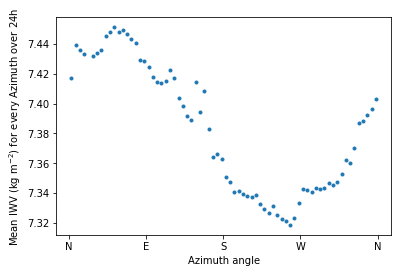

In [87]:
#vertical mean: mean for every azi angle
iwv_mean_vert = np.mean(mean_2scans2,axis=0)

xticks = [0,90,180,270,360]
xlabels = ['N','E', 'S', 'W', 'N']

plt.plot(iwv_azi8[1][:72],iwv_mean_vert,'.')
plt.xticks(xticks,xlabels)           
plt.xlabel('Azimuth angle')
plt.ylabel(r'Mean IWV (kg m$^{-2}$) for every Azimuth over 24h')